<a href="https://colab.research.google.com/github/mynkchaudhry/PEGASUS-Fine-Tuned-for-Dialogue-Summarization/blob/main/FinetuneSummarizeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Fine-Tuning PEGASUS for Dialogue Summarization.`**


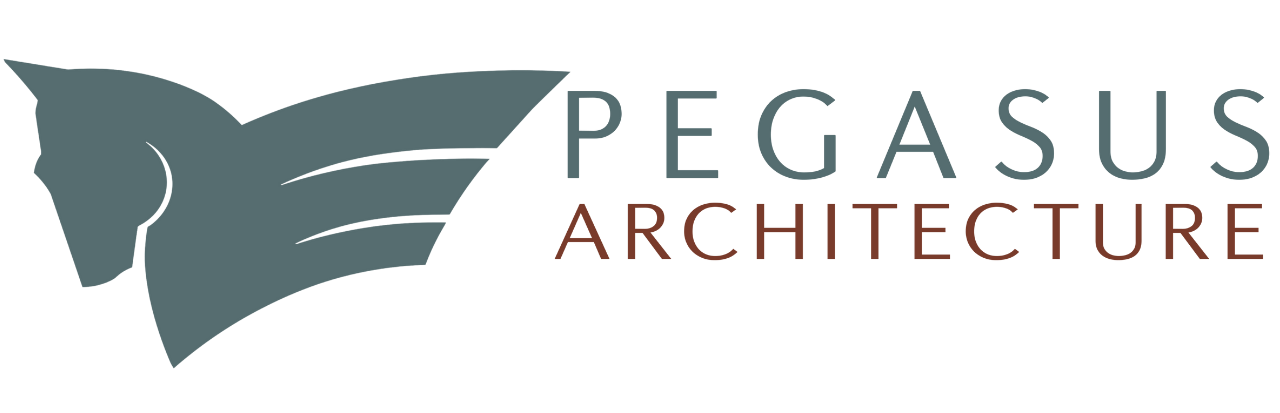


*This project involves fine-tuning the PEGASUS model to generate concise summaries of dialogues from the SAMSum dataset. By adapting a pre-trained PEGASUS model, this workflow optimizes its performance specifically for summarizing conversational data. The process includes data preparation, model training, evaluation using ROUGE metrics, and visualizing token length distributions. The final model and tokenizer are saved and shared on the Hugging Face Model Hub for further use.*

**Transformers[sentencepiece]**: A library providing state-of-the-art machine learning models, specifically focusing on transformer models and requiring sentencepiece for tokenization.

**Datasets:** A library for easily accessing and using datasets, primarily in the context of machine learning and natural language processing.

**Sacrebleu**: A library for calculating BLEU scores, used to evaluate the quality of text generated by machine learning models.

**rouge_score**: A library for computing ROUGE scores, another set of metrics for evaluating the quality of text summaries.

**py7zr**: A library for working with 7zip archives, useful for handling compressed files.

In [ ]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.

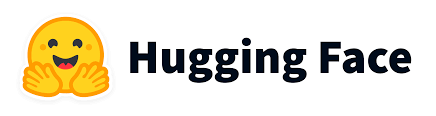


**Huggingface_hub**: A library for interfacing with the Hugging Face Hub, allowing easy access to pre-trained models and datasets, and enabling model sharing and collaboration.


In [ ]:
!pip install huggingface_hub

**Libraries Used:**

**Transformers:** Provides tools for working with transformer models, including pipelines and model initialization.


**matplotlib:** Used for creating visualizations and plots.

**datasets:**For loading datasets and metrics from the Hugging Face Hub.
pandas: A library for data manipulation and analysis.

**nltk:** The Natural Language Toolkit, used here for sentence tokenization.

**tqdm:** A library for displaying progress bars in loops.

**torch:** PyTorch, a deep learning framework.

**Additional Setup:**

**nltk.download("punkt"):** Downloads the Punkt tokenizer models from NLTK, which are required for sentence tokenization.

In [ ]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
from datasets import load_dataset, load_metric

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import nltk
from nltk.tokenize import sent_tokenize

from tqdm import tqdm
import torch

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Key Points:**

**Device Selection:**

**Device** **=** **"cuda"** **if torch.cuda.is_available()** **else** **"cpu":** Checks if a GPU is available and sets the device accordingly. This ensures that the model uses the GPU for faster computation if available.
Model Checkpoint:

**Model_ckpt** **=** **"google/pegasus-cnn_dailymail":** Specifies the pre-trained model to be used. In this case, it’s the PEGASUS model fine-tuned on the CNN/Daily Mail dataset.
Tokenizer:

**Tokenizer** **=** **AutoTokenizer.from_pretrained(model_ckpt):** Loads the tokenizer corresponding to the model checkpoint, which is used for encoding and decoding text.
Model:

**Model_pegasus** **=** **AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device):** Loads the pre-trained sequence-to-sequence language model and moves it to the specified device (GPU or CPU).

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

device = "cuda" if torch.cuda.is_available() else "cpu"

model_ckpt = "google/pegasus-cnn_dailymail"

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]



**Definition:**

**`def generate_batch_sized_chunks(list_of_elements, batch_size):`**

**Args:**

**`list_of_elements`** (**list**): The list of elements to be split into batches.

**`batch_size`** (**int**): The size of each batch.

**Description:**

Splits the dataset into smaller batches that can be processed simultaneously. Yields successive batch-sized chunks from `list_of_elements`.

**Returns:**

**Generator**: Yields chunks of the list, each with a size equal to `batch_size` (except possibly the last chunk).



In [ ]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

**Definition:**

**`def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,`**

**`batch_size=16, device=device, column_text="article", column_summary="highlights"):`**

**Args:**

- **`dataset`** (**dict**): The dataset containing text and summary columns.
- **`metric`** (**Metric**): The metric object used for evaluation.
- **`model`** (**PreTrainedModel**): The pre-trained model used for generating summaries.
- **`tokenizer`** (**PreTrainedTokenizer**): The tokenizer used for encoding and decoding text.
- **`batch_size`** (**int**, optional, default=16): The size of each batch for processing.
- **`device`** (**str**, optional, default=`device`): The device to run the model on (e.g., 'cuda' or 'cpu').
- **`column_text`** (**str**, optional, default="article"): The column in the dataset that contains the text to be summarized.
- **`column_summary`** (**str**, optional, default="highlights"): The column in the dataset that contains the reference summaries.

**Description:**

Splits the dataset into smaller batches, generates summaries using the provided model, and evaluates the summaries against the reference using the specified metric. The function computes and returns the evaluation scores.

**Steps:**

1. **Batching:**
   - Splits the dataset into batches of text and summaries using `generate_batch_sized_chunks`.

2. **Summarization:**
   - Tokenizes each batch of articles.
   - Generates summaries for each batch using the model.

3. **Decoding:**
   - Decodes the generated summaries and replaces specific tokens.

4. **Evaluation:**
   - Adds the decoded summaries and references to the metric.
   - Computes and returns the evaluation scores.

**Returns:**

- **dict**: The computed evaluation scores from the metric.


In [ ]:

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the  token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score

### Dataset Exploration

This section demonstrates how to load and explore the `samsum` dataset, including inspecting its splits and viewing sample data.


In [ ]:
dataset_samsum = load_dataset("samsum",trust_remote_code=True)

split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]

print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")

print(dataset_samsum["test"][1]["dialogue"])

print("\nSummary:")

print(dataset_samsum["test"][1]["summary"])

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Eric: MACHINE!
Rob: That's so gr8!
Eric: I know! And shows how Americans see Russian ;)
Rob: And it's really funny!
Eric: I know! I especially like the train part!
Rob: Hahaha! No one talks to the machine like that!
Eric: Is this his only stand-up?
Rob: Idk. I'll check.
Eric: Sure.
Rob: Turns out no! There are some of his stand-ups on youtube.
Eric: Gr8! I'll watch them now!
Rob: Me too!
Eric: MACHINE!
Rob: MACHINE!
Eric: TTYL?
Rob: Sure :)

Summary:
Eric and Rob are going to watch a stand-up on youtube.


**Accessing Sample Data from the `samsum` Dataset**

To retrieve and inspect a sample dialogue from the `samsum` dataset, you can use the following code:



In [ ]:
dataset_samsum['test'][0]['dialogue']


"Hannah: Hey, do you have Betty's number?\nAmanda: Lemme check\nHannah: <file_gif>\nAmanda: Sorry, can't find it.\nAmanda: Ask Larry\nAmanda: He called her last time we were at the park together\nHannah: I don't know him well\nHannah: <file_gif>\nAmanda: Don't be shy, he's very nice\nHannah: If you say so..\nHannah: I'd rather you texted him\nAmanda: Just text him 🙂\nHannah: Urgh.. Alright\nHannah: Bye\nAmanda: Bye bye"

**Summarization Using the Pipeline**

This section demonstrates how to use a pre-trained summarization model with the `pipeline` function from the `transformers` library to summarize a sample dialogue from the `samsum` dataset.



In [ ]:
pipe = pipeline('summarization', model = model_ckpt )

pipe_out = pipe(dataset_samsum['test'][0]['dialogue'] )

print(pipe_out)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 128, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


[{'summary_text': "Amanda: Ask Larry Amanda: He called her last time we were at the park together .<n>Hannah: I'd rather you texted him .<n>Amanda: Just text him ."}]


**Initialize Pipeline:**

**pipe** = pipeline('summarization', model=model_ckpt): This line creates a summarization pipeline using the specified pre-trained model checkpoint. The pipeline function from the transformers library is used to set up the summarization task with the given model.
Generate Summary:

**pipe_out** = pipe(dataset_samsum['test'][0]['dialogue']): This line uses the summarization pipeline to generate a summary for the dialogue from the first item in the test split of the samsum dataset. The pipe function processes the provided text and returns a summary.
Format Output:

**print**(pipe_out[0]['summary_text'].replace(" .", ".\n")): This line prints the generated summary. The replace(" .", ".\n") method formats the summary so that each sentence appears on a new line, improving readability.


In [ ]:
print(pipe_out[0]['summary_text'].replace(" .", ".\n"))


Amanda: Ask Larry Amanda: He called her last time we were at the park together.
<n>Hannah: I'd rather you texted him.
<n>Amanda: Just text him.





**Load ROUGE Metric:**

**`rouge_metric = load_metric('rouge')`**: This line loads the ROUGE metric from the `datasets` library. ROUGE (Recall-Oriented Understudy for Gisting Evaluation) is commonly used for evaluating summarization tasks by comparing generated summaries to reference summaries.

**Calculate ROUGE Scores:**

**`score = calculate_metric_on_test_ds(...)`**: This line calculates the ROUGE scores using the `calculate_metric_on_test_ds` function. The function takes several arguments:
- **`dataset_samsum['test']`**: The test split of the `samsum` dataset containing the dialogues and summaries.
- **`rouge_metric`**: The ROUGE metric object used for evaluation.
- **`model_pegasus`**: The pre-trained PEGASUS model used for generating summaries.
- **`tokenizer`**: The tokenizer corresponding to the PEGASUS model.
- **`column_text='dialogue'`**: The column name in the dataset that contains the text to be summarized.
- **`column_summary='summary'`**: The column name in the dataset that contains the reference summaries.
- **`batch_size=8`**: The batch size for processing the dataset.


In [ ]:
rouge_metric = load_metric('rouge')

score = calculate_metric_on_test_ds(dataset_samsum['test'], rouge_metric, model_pegasus, tokenizer, column_text = 'dialogue', column_summary='summary', batch_size=8)


<ipython-input-11-388971e09d3a>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric('rouge')


The repository for rouge contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/rouge.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


100%|██████████| 103/103 [18:38<00:00, 10.86s/it]


**Define ROUGE Metric Names:**

**`rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]`**: This line defines the names of the ROUGE metrics to extract from the scores. ROUGE-1, ROUGE-2, ROUGE-L, and ROUGE-Lsum are commonly used metrics for evaluating summarization performance.

**Create ROUGE Dictionary:**

**`rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)`**: This line creates a dictionary where each key is a ROUGE metric name, and each value is the corresponding F-measure score from the `score` object. The F-measure represents the harmonic mean of precision and recall for each ROUGE metric.

**Convert to DataFrame:**

**`pd.DataFrame(rouge_dict, index=['pegasus'])`**: This line converts the dictionary into a Pandas DataFrame for easy visualization. The DataFrame will have the ROUGE metric names as columns and a single row indexed as 'pegasus' showing the F-measure scores for each metric.


In [ ]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame(rouge_dict, index = ['pegasus'])


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.015558,0.000301,0.015546,0.015532


**Calculate Token Lengths:**

**`dialogue_token_len = len([tokenizer.encode(s) for s in dataset_samsum['train']['dialogue']])`**: This line computes the token lengths for each dialogue in the training split of the `samsum` dataset by encoding each dialogue using the tokenizer and then measuring the length of each encoded sequence.

**`summary_token_len = len([tokenizer.encode(s) for s in dataset_samsum['train']['summary']])`**: Similarly, this line computes the token lengths for each summary in the training split.

**Create Histograms:**

**`fig, axes = plt.subplots(1, 2, figsize=(10, 4))`**: Creates a figure with two subplots arranged in a single row.

**`axes[0].hist(dialogue_token_len, bins=20, color='C0', edgecolor='C0')`**: Plots a histogram of dialogue token lengths with 20 bins, colored in blue.

**`axes[0].set_title("Dialogue Token Length")`**: Sets the title of the first subplot.

**`axes[0].set_xlabel("Length")`**: Sets the x-axis label of the first subplot.

**`axes[0].set_ylabel("Count")`**: Sets the y-axis label of the first subplot.

**`axes[1].hist(summary_token_len, bins=20, color='C0', edgecolor='C0')`**: Plots a histogram of summary token lengths with 20 bins, colored in blue.

**`axes[1].set_title("Summary Token Length")`**: Sets the title of the second subplot.

**`axes[1].set_xlabel("Length")`**: Sets the x-axis label of the second subplot.

**`plt.tight_layout()`**: Adjusts the layout to prevent overlap of subplot elements.

**`plt.show()`**: Displays the histograms.

**Output:**

The output will be two histograms:
- One showing the distribution of token lengths for dialogues.
- One showing the distribution of token lengths for summaries.



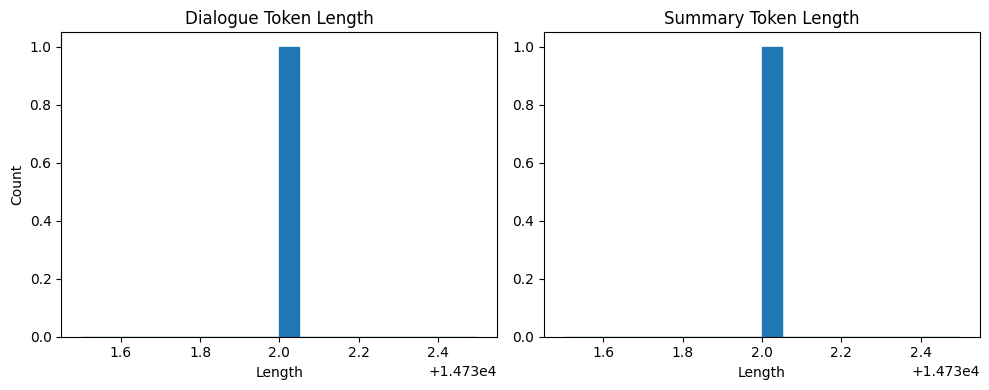


Token indices sequence length is longer than the specified maximum sequence length for this model (1044 > 1024). Running this sequence through the model will result in indexing errors


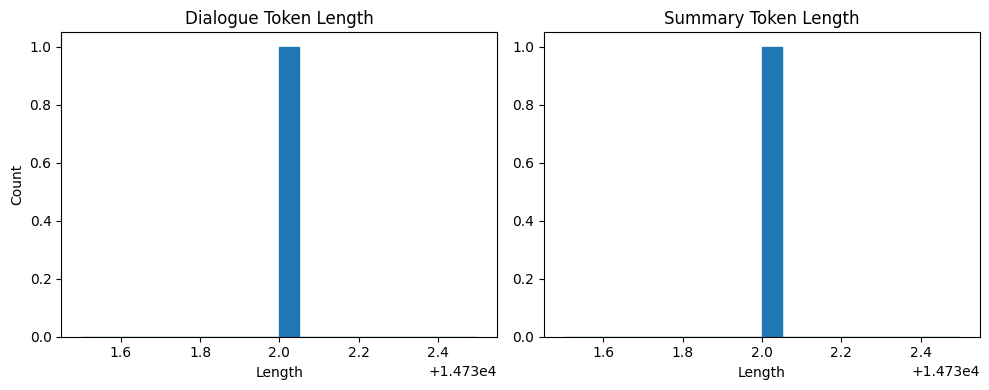

In [ ]:
dialogue_token_len = len([tokenizer.encode(s) for s in dataset_samsum['train']['dialogue']])

summary_token_len = len([tokenizer.encode(s) for s in dataset_samsum['train']['summary']])


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(dialogue_token_len, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(summary_token_len, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

**Define the Conversion Function:**

**`def convert_examples_to_features(example_batch):`**: Defines a function to convert examples into features suitable for model training or evaluation.

- **`input_encodings = tokenizer(example_batch['dialogue'], max_length=1024, truncation=True)`**: Encodes the dialogues in the batch with a maximum length of 1024 tokens. This truncates dialogues longer than this length to fit within the model’s input size.

- **`with tokenizer.as_target_tokenizer():`**: Context manager that sets the tokenizer to handle target text specifically. This is used for sequence-to-sequence tasks.

- **`target_encodings = tokenizer(example_batch['summary'], max_length=128, truncation=True)`**: Encodes the summaries in the batch with a maximum length of 128 tokens. This truncates summaries longer than this length to fit within the model’s output size.

- **`return { 'input_ids': input_encodings['input_ids'], 'attention_mask': input_encodings['attention_mask'], 'labels': target_encodings['input_ids'] }`**: Returns a dictionary containing:
  - **`'input_ids'`**: Token IDs for the input dialogues.
  - **`'attention_mask'`**: Attention masks indicating which tokens should be attended to.
  - **`'labels'`**: Token IDs for the target summaries (used for computing loss during training).

**Apply the Conversion Function:**

**`dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched=True)`**: Applies the `convert_examples_to_features` function to each batch of the `dataset_samsum`. This transforms the dataset into a format suitable for model training or evaluation.


In [ ]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch['dialogue'] , max_length = 1024, truncation = True )

    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch['summary'], max_length = 128, truncation = True )

    return {
        'input_ids' : input_encodings['input_ids'],
        'attention_mask': input_encodings['attention_mask'],
        'labels': target_encodings['input_ids']
    }

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched = True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

**Initialize Data Collator:**

**`from transformers import DataCollatorForSeq2Seq`**: Imports the `DataCollatorForSeq2Seq` class from the `transformers` library, which is used to prepare batches of data for sequence-to-sequence models.

**`seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model_pegasus)`**: Initializes a data collator for sequence-to-sequence tasks. It takes the following parameters:
- **`tokenizer`**: The tokenizer used for encoding and decoding sequences.
- **`model=model_pegasus`**: The pre-trained sequence-to-sequence model (PEGASUS in this case) used to determine the proper padding and attention mask settings.

The `DataCollatorForSeq2Seq` handles tasks like dynamic padding and creating attention masks, ensuring that batches of data are correctly formatted for the sequence-to-sequence model.


In [ ]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model_pegasus)



**Mount Google Drive and Change Directory:**

1. **Mount Google Drive:**

   **`from google.colab import drive`**: Imports the `drive` module from the `google.colab` library, which is used to interact with Google Drive within a Google Colab environment.

   **`drive.mount('/content/drive')`**: Mounts Google Drive to the `/content/drive` directory in the Colab environment. This allows you to access files stored in your Google Drive from within the Colab notebook.

2. **Change Directory:**

   **`%cd /content/drive/MyDrive`**: Changes the current working directory to `/content/drive/MyDrive`. This directory is within the mounted Google Drive and is specified for accessing files stored in the "MyDrive" folder.

   By executing this command, you navigate to the specified directory in Google Drive, making it easier to work with files located there in your Colab notebook.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


**Configure Training Arguments:**

**`from transformers import TrainingArguments, Trainer`**: Imports the `TrainingArguments` and `Trainer` classes from the `transformers` library. `TrainingArguments` is used to specify training parameters, while `Trainer` is a class for managing the training loop.

**`trainer_args = TrainingArguments(...`**: Initializes the `TrainingArguments` with the following parameters:

- **`output_dir='pegasus-samsum'`**: Specifies the directory where the model checkpoints and logs will be saved.

- **`num_train_epochs=1`**: Sets the number of training epochs. In this case, the model will be trained for 1 epoch.

- **`warmup_steps=500`**: Number of warmup steps for learning rate scheduling. During these steps, the learning rate will increase linearly.

- **`per_device_train_batch_size=1`**: Batch size for training on each device (e.g., GPU or CPU). Here, it is set to 1.

- **`per_device_eval_batch_size=1`**: Batch size for evaluation on each device. It is also set to 1.

- **`weight_decay=0.01`**: Weight decay rate for regularization. A value of 0.01 is used to prevent overfitting.

- **`logging_steps=10`**: Frequency (in steps) at which training logs will be written. Logs will be recorded every 10 steps.

- **`evaluation_strategy='steps'`**: Specifies the strategy for evaluation. The model will be evaluated every few steps.

- **`eval_steps=500`**: Number of steps between evaluations. The model will be evaluated every 500 steps.

- **`save_steps=1e6`**: Number of steps between saving model checkpoints. The model will be saved every 1 million steps (which effectively means infrequently).

- **`gradient_accumulation_steps=16`**: Number of steps to accumulate gradients before performing a backward pass. This allows for larger effective batch sizes while using a small batch size.

This configuration sets up the parameters needed for training a model using the `Trainer` class from the `transformers` library.


In [ ]:
from transformers import TrainingArguments, Trainer

trainer_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


**Initialize Trainer:**

**`from transformers import Trainer`**: Imports the `Trainer` class from the `transformers` library, which is used to handle the training and evaluation of the model.

**`trainer = Trainer(...`**: Initializes the `Trainer` with the following parameters:

- **`model=model_pegasus`**: Specifies the pre-trained PEGASUS model to be used for training and evaluation.

- **`args=trainer_args`**: Passes the training arguments defined in the `TrainingArguments` class. These arguments configure aspects such as the number of epochs, batch size, and evaluation frequency.

- **`tokenizer=tokenizer`**: Provides the tokenizer used to encode and decode text for the model. It ensures that the input data is correctly processed.

- **`data_collator=seq2seq_data_collator`**: Uses the `DataCollatorForSeq2Seq` to handle dynamic padding and create attention masks for the data batches.

- **`train_dataset=dataset_samsum_pt["train"]`**: Specifies the training dataset, which has been preprocessed and converted to features suitable for model training.

- **`eval_dataset=dataset_samsum_pt["validation"]`**: Specifies the evaluation dataset, which is used to assess the model's performance during training.

This setup configures the `Trainer` to manage the training and evaluation processes, using the specified model, tokenizer, data collator, and datasets.


In [ ]:
trainer = Trainer(model=model_pegasus, args=trainer_args,
                  tokenizer=tokenizer, data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"],
                  eval_dataset=dataset_samsum_pt["validation"])

**Start Training:**

**`trainer.train()`**: Begins the training process for the model using the `Trainer` class. This method:

- **Executes Training:** Runs the training loop based on the configuration specified in `TrainingArguments`.
- **Utilizes Datasets:** Uses the training dataset (`train_dataset`) to update the model's weights and the evaluation dataset (`eval_dataset`) to monitor performance during training.
- **Applies Training Parameters:** Follows the training parameters set in `trainer_args`, such as the number of epochs, batch size, and evaluation strategy.

This command initiates the training process, allowing the model to learn from the provided dataset and improve its performance based on the specified training configurations.


In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
500,1.659900,1.483296


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128, 'min_length': 32, 'num_beams': 8, 'length_penalty': 0.8, 'forced_eos_token_id': 1}


TrainOutput(global_step=920, training_loss=1.8251974468645842, metrics={'train_runtime': 2836.2596, 'train_samples_per_second': 5.194, 'train_steps_per_second': 0.324, 'total_flos': 5528248038285312.0, 'train_loss': 1.8251974468645842, 'epoch': 0.9991854466467553})

**Calculate ROUGE Scores:**

**`score = calculate_metric_on_test_ds(...`**: Computes ROUGE scores for the model's predictions on the test dataset using the `calculate_metric_on_test_ds` function. The parameters include:

- **`dataset_samsum['test']`**: The test split of the `dataset_samsum`, containing dialogues and summaries for evaluation.
- **`rouge_metric`**: The ROUGE metric object used for evaluation.
- **`trainer.model`**: The trained PEGASUS model used to generate summaries for the test data.
- **`tokenizer`**: The tokenizer used to encode and decode text.
- **`batch_size=2`**: Batch size for processing the dataset during evaluation.
- **`column_text='dialogue'`**: The column in the dataset containing the text to be summarized.
- **`column_summary='summary'`**: The column in the dataset containing the reference summaries.

**`rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )`**: Creates a dictionary of ROUGE scores, where **`rouge_names`** includes metrics such as ROUGE-1, ROUGE-2, ROUGE-L, and ROUGE-Lsum. The dictionary contains the F-measure values for each ROUGE metric.

**`pd.DataFrame(rouge_dict, index=[f'pegasus'])`**: Converts the dictionary of ROUGE scores into a pandas DataFrame for better readability and presentation. The index is set to `['pegasus']` to label the rows.

This code calculates and presents the ROUGE scores for the model's performance on the test dataset, summarizing the results in a DataFrame.


In [ ]:
score = calculate_metric_on_test_ds(
    dataset_samsum['test'], rouge_metric, trainer.model, tokenizer, batch_size = 2, column_text = 'dialogue', column_summary= 'summary'
)

rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame(rouge_dict, index = [f'pegasus'] )

100%|██████████| 410/410 [13:28<00:00,  1.97s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.018775,0.000351,0.018633,0.018677


**Save Model:**

**`model_pegasus.save_pretrained("Summarization-Pro")`**: Saves the trained PEGASUS model to the specified directory, **`"Summarization-Pro"`**.

- **`save_pretrained("Summarization-Pro")`**: The method saves both the model's configuration and weights to the given directory. This allows you to reload and use the model later without needing to retrain it.

This command ensures that the model's state is preserved and can be easily restored or shared for future use.


In [ ]:

## Save model
model_pegasus.save_pretrained("Summarization-Pro")


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128, 'min_length': 32, 'num_beams': 8, 'length_penalty': 0.8, 'forced_eos_token_id': 1}




**Save Tokenizer:**

**`tokenizer.save_pretrained("tokenizer")`**: Saves the tokenizer to the specified directory, **`"tokenizer"`**.

- **`save_pretrained("tokenizer")`**: The method saves the tokenizer's configuration and vocabulary to the given directory. This ensures that you can reload the tokenizer later with the same settings and vocabulary, maintaining consistency with the model.

This command is essential for preserving the tokenizer's state, making it easier to reload or share alongside the model for future use.


In [ ]:

## Save tokenizer
tokenizer.save_pretrained("tokenizer")

('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/spiece.model',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

**Login to Hugging Face:**

**`!huggingface-cli login`**: Initiates the login process for the Hugging Face CLI (Command Line Interface).

- **`huggingface-cli login`**: Prompts you to enter your Hugging Face credentials (usually an authentication token) to access and manage your Hugging Face account and resources. This allows you to interact with Hugging Face's services, such as uploading models or datasets, directly from your command line or notebook environment.

**Push Model to Hugging Face Hub:**

**`model_pegasus.push_to_hub("mynkchaudhry/Summarization-Pro")`**: Uploads the trained PEGASUS model to the Hugging Face Model Hub under the specified repository name, **`"mynkchaudhry/Summarization-Pro"`**.

- **`push_to_hub("mynkchaudhry/Summarization-Pro")`**: The method pushes the model's configuration, weights, and other related files to the Hugging Face Model Hub. This allows others to access, share, and use the model. The model will be stored in the repository named "mynkchaudhry/Summarization-Pro".

**Push Tokenizer to Hugging Face Hub:**

**`tokenizer.push_to_hub("mynkchaudhry/Summarization-Pro")`**: Uploads the tokenizer to the Hugging Face Model Hub under the specified repository name, **`"mynkchaudhry/Summarization-Pro"`**.

- **`push_to_hub("mynkchaudhry/Summarization-Pro")`**: The method pushes the tokenizer's configuration and vocabulary to the Hugging Face Model Hub. This ensures that the tokenizer, which is essential for processing text in the same manner as during training, is available alongside the model. It will be stored in the same repository named "mynkchaudhry/Summarization-Pro".

These commands are used to authenticate with the Hugging Face platform, upload both the model and tokenizer to the Hugging Face Model Hub, and ensure they are available for future use and sharing.


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [ ]:
model_pegasus.push_to_hub("mynkchaudhry/Summarization-Pro")

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 128, 'min_length': 32, 'num_beams': 8, 'length_penalty': 0.8, 'forced_eos_token_id': 1}


model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/mynkchaudhry/Summarization-Pro/commit/3cce3cf1bdb2ced08348196f77b5f132ef4dd520', commit_message='Upload PegasusForConditionalGeneration', commit_description='', oid='3cce3cf1bdb2ced08348196f77b5f132ef4dd520', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
tokenizer.push_to_hub("mynkchaudhry/Summarization-Pro")

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/mynkchaudhry/Summarization-Pro/commit/6d7684415dff15564ee3ce1e9f17c5e81f9b1295', commit_message='Upload tokenizer', commit_description='', oid='6d7684415dff15564ee3ce1e9f17c5e81f9b1295', pr_url=None, pr_revision=None, pr_num=None)

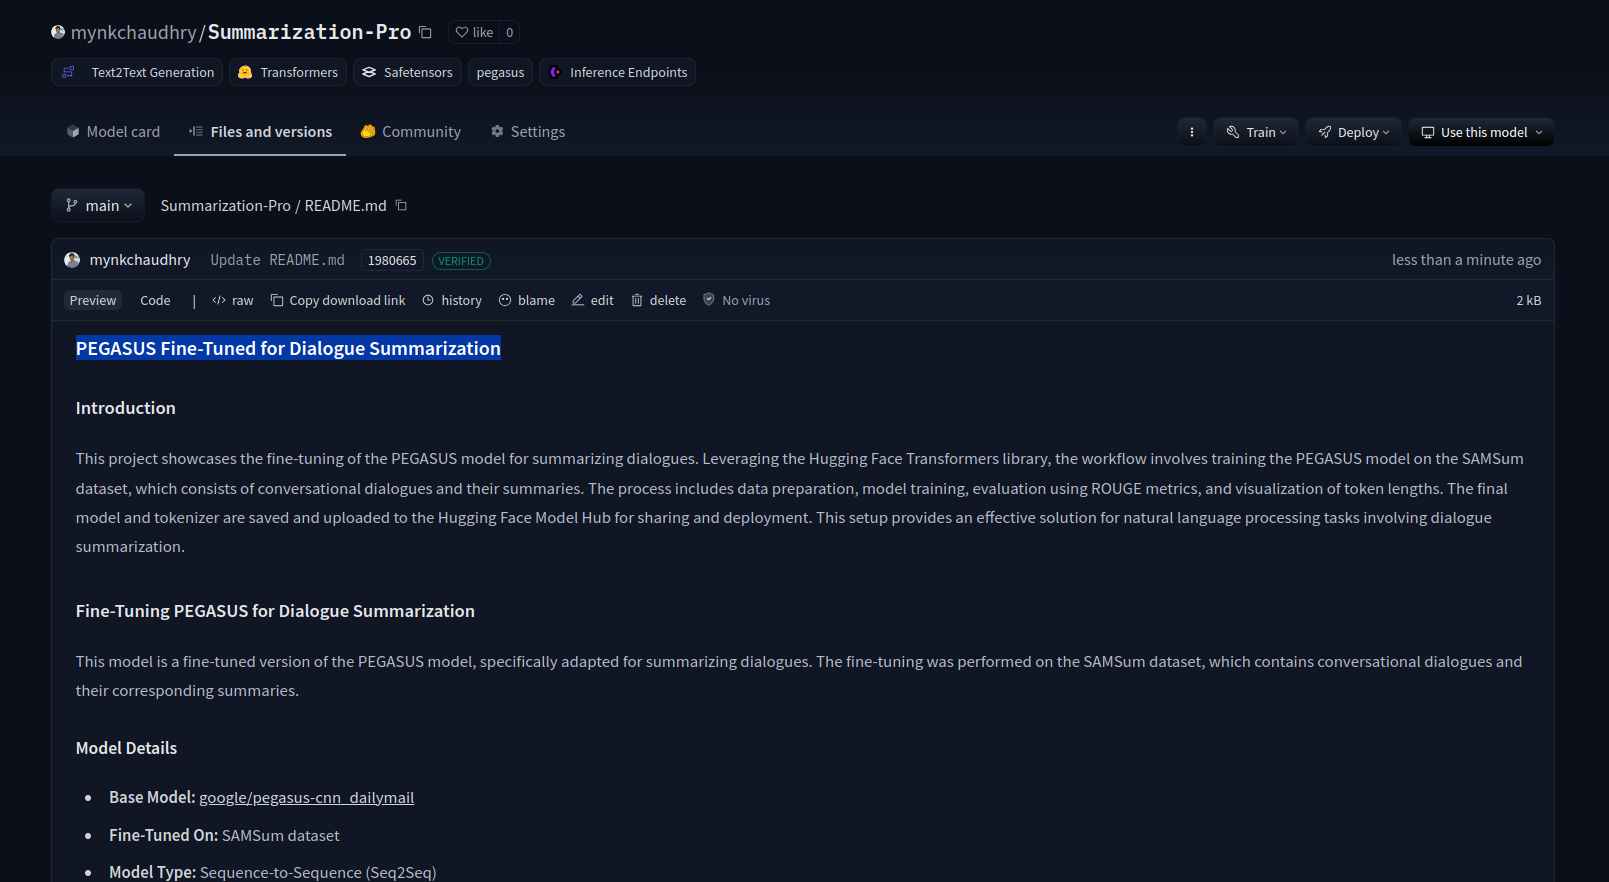